## 사이킷런으로 수행하는 타이타닉 생존자 예측

* 캐글에서 제공하는 타이타닉 탑승자 데이터 기반으로
* 생존자 예측을 사이킷런으로 수행

* 타이타닉 생존자 데이터
    - 머신러닝에 입문하는 데이터 분석가/과학자를 위한 기초 예제로 제공
    - 많은 캐글 이용자가 자신의 방법으로 타이타닉 생존자 예측을 수행하고
    - 수행 방법을 캐글에 공유

* 캐글 : 데이터 분석 오픈 포탈
    - 세계적인 ML 기반 분석 대회를 온라인 상에서 주관
    
캐글사이트 : https://www.kaggle.com/c/titanic/data

## 변수 별 정보

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

titanic_df = pd.read_csv('data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<!-- # * Passengerid: 탑승자 데이터 일련번호
# * survived: 생존 여부, 0 = 사망, 1 = 생존
# * Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
# * sex: 탑승자 성별
# * name: 탑승자 이름
# * Age: 탑승자 나이
# * sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
# * parch: 같이 탑승한 부모님 또는 어린이 인원수
# * ticket: 티켓 번호
# * fare: 요금
# * cabin: 선실 번호
# * embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton -->

* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton


In [2]:
titanic_df.shape

(891, 12)

In [3]:
# 데이터 칼럼 타입 확인
print('\n ### train 데이터 정보 ###  \n')
titanic_df.shape
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


데이터 정보 확인
- RangeIndex: 891 entries, 0 to 890 : 전체 행 (891개 행)
- Data columns (total 12 columns): 칼럼 수 (12개)
- float64 : 2개
- int64 : 5개
- object(string) : 5개
 - (판다스는 넘파이 기반으로 만들어졌는데
 - 넘파이의 String 타입의 길이 제한이 있기 때문에 
 - 이에 대한 구분을 위해 object 타입으로 명기)
- Age : 714개 (Null값(NaN): 177개)
- Cabin : 204개 (Null값(NaN): 687개)
- Embarked : 889개 (Null값(NaN): 2개)

## 결측치 파악

In [4]:
# Null 값 개수 확인
titanic_df['Age'].isnull().sum()

177

In [5]:
titanic_df['Cabin'].isnull().sum()

687

In [6]:
titanic_df['Embarked'].isnull().sum()

2

##  데이터 전처리 : 결측치 처리

### NULL 컬럼들에 대한 처리

- 사이킷 머신러닝 알고리즘은 Null 값을 허용하지 않으므로
- Null 값을 어떻게 처리할지 결정
- DataFrame()의 fillna() 메서드를 사용해서 
- Null 값을 평균 또는 고정 값으로 변경
- Age : 평균 나이로 변경
- 나머지 칼럼 : 'N'으로 변경

In [7]:
# Null 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

# 모든 칼럼의 Null 값을 합산해서 Null 값이 없는지 확인
print('각 칼럼의 Null 값 갯수 ',titanic_df.isnull().sum())
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

각 칼럼의 Null 값 갯수  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
데이터 세트 Null 값 갯수  0


### 문자열 변수(피처) 빈도 분포 확인 : value_counts()

In [8]:
# 문자열 피처 (Sex, Cabin, Embarked) 값 분류 확인

print(' Sex 값 분포 :\n', end=''); print(titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', end=''); print(titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', end=''); print(titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
N              687
B96 B98          4
C23 C25 C27      4
G6               4
F2               3
              ... 
D45              1
E68              1
E34              1
C85              1
C32              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


### 문자열 변수 Cabin값 변경

In [9]:
# Cabin 칼럼 값 중에서 첫 번째 문자만 추출
titanic_df['Cabin'].str[0]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [10]:
# Cabin 칼럼 값 중에서 첫 번째 문자만 추출
titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [11]:
# Cabin 값을 선실등급만으로 표기 (선실 번호 제외)
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] 
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [12]:
# 선실등급 별 개수 확인
print('Cabin 값 분포 :\n', end=''); print(titanic_df['Cabin'].value_counts())

Cabin 값 분포 :
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


## 성별에 따른 생존자수 분포(EDA)

머신러닝 알고리즘 적용해서 예측 수행 전에 데이터 탐색
- 어떤 유형의 승객이 생존 확률이 높았는지 확인
- 성별이 생존 확률에 어떤 영향을 미쳤는지 확인
- 성별에 따른 생존자 수 비교

In [13]:
# 성별(Sex) 분포 확인
titanic_df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [14]:
# 성별(Sex) 생존(Survived) 확인
# 사망 : 0
# 생존 : 1
# Survived 칼럼 : 레이블로 결정 클래스 값
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

# 여자 : 314명 중 233명 생존 (약 74.2% 생존)
# 남자 : 577명 중 109명 생존 (약 18.8% 생존)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

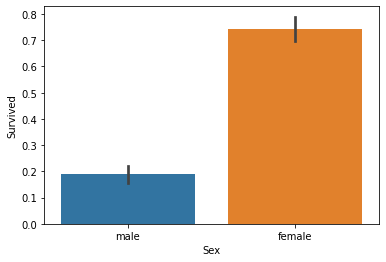

In [15]:
# 성별 생존자 : 막대 그래프 (barplot)
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

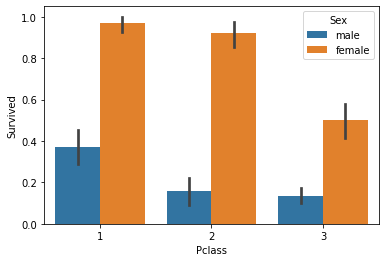

In [17]:
# 객실 등급별/성별 생존 확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
# 여성 : 1, 2등실에 따른 생존 확률의 차이는 크지 않으나
#         3등실의 경우 생존 확률이 상대적으로 떨어짐
# 남성 : 2,3등실 보다 1등실 생존 확률이 월등히 높음

## 데이터 전처리 : 구간화(binning)

### 연령대에 따른 생존자수 분포
- 연령은 수치형 변수이므로 범주형으로 구간화(binning)

In [ ]:
# 연령별(Age) 생존 확률 확인

# Age의 값 종류가 많기 때문에 범위별로 분류해 카테고리 값 할당

In [18]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. 
# DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'        # -1 이하 오류 값
    elif age <= 5: cat = 'Baby'          # 0~5세 
    elif age <= 12: cat = 'Child'        # 6~12세
    elif age <= 18: cat = 'Teenager'     # 13~18세
    elif age <= 25: cat = 'Student'      # 19~25세
    elif age <= 35: cat = 'Young Adult'  # 26~35
    elif age <= 60: cat = 'Adult'        # 36~60
    else : cat = 'Elderly'               # 61세 이상
    
    return cat

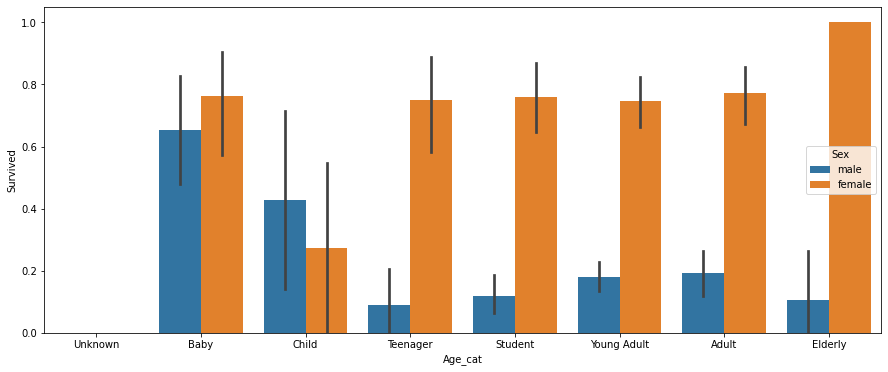

In [19]:
# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(15,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

## 데이터 전처리 : 인코딩

### 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
* 인코딩 : 사이킷런의 LabelEncoder 클래스 이용해서 레이블 인코딩 적용
* 0 ~ (카테고리 유형수 -1) 숫자 값으로 변환
* fit() / transform() 메서드 사용

In [20]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코딩 함수
def encode_features(dataDF):
    # 문자열 카테고리 피처
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [ ]:
# from sklearn import preprocessing

# # 레이블 인코딩 함수
# def encode_features(dataDF, features):
#     for feature in features:
#         le = prepeocessing.LabelEncoder()
#         le = le.fit(dataDF[feature])
#         dataDF[feature] = le.transform(dataDF[feature])
        
#         return dataDF

# # 문자열 카테코리 피처
# titanic_df = encode_features(titanic_df, ['Cabin', 'Sex', 'Embarked'])
# titanic_df.head()

## 데이터 전처리 : 삭제
- PassengerId, Name, Ticket 변수 삭제
- drop(labels=None, axis=0, inplace=False) 함수 사용

In [21]:
# 불필요한 변수 제거 drop()함수 : PassengerId, Name, Ticket 변수
titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


###### 지금 까지 가공한내용을  정리하고 함수로 작성 (재사용 가능) #######

In [22]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 첫문자만 추출
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)

    return df

---
## 생존자 예측 프로세스

### 1단계. 데이터 로딩
- 피처 데이터셋, 레이블 데이터셋 추출

In [23]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('data/titanic_train.csv')
# 결정값
y_titanic_df = titanic_df['Survived']
# 학습 데이터 세트
# 결정값으로 사용할 'Survived' 칼럼 제외
X_titanic_df= titanic_df.drop('Survived',axis=1)

### 2단계. 데이터 전처리
- 피처 데이터 세트에 transform_features()를 적용해 데이터 가공

In [24]:
# 데이터 전처리 함수 호출
X_titanic_df = transform_features(X_titanic_df)
X_titanic_df.head(5)
# 생존자 예측을 수행할 피처 데이터 세트 완성

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


### 3단계. Data Split : 학습 데이터/테스트 데이터

In [46]:
# 학습 / 테스트 데이터 세트 분리
# 테스트 데이터 세트 : 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

In [40]:
type(X_train)

pandas.core.frame.DataFrame

### 4단계. 분류 알고리즘을 적용한 학습/예측/평가

* 3개의 ML 알고리즘 수행  
     - 결정 트리, 랜덤 포레스트, 로지스틱 회귀(분류)
* 이 3개의 알고리즘으로 예측 수행하고 
* 교차 검증으로 평가

사이킷런 클래스
* 결정 트리 : DecisionTreeClassifier
* 랜덤 포레스트 : RandomForestClassifier
* 로지스틱 회귀 : LogisticRegression
    
train_test_split()으로 분리한 학습 데이터와 테스트 데이터를 기반으로
* 머신러닝 모델을 학습하고(fit), 예측 수행(predict)
* 예측 성능 평가 :  정확도 (accuracy_score() 사용)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
# 결정트리, 랜덤포레스트, 로지스틱회귀를 위한 estimator 객체 생성
dt_clf = DecisionTreeClassifier(random_state=12)
rf_clf = RandomForestClassifier(random_state=12)
lr_clf = LogisticRegression()

In [32]:
# 결정트리 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('결정트리의 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 랜덤포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤포레스트의 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 로지스틱회귀 학습/예측/평가
# lr_clf.fit(X_train, y_train)
# lr_pred = lr_clf.predict(X_test)
# print('로지스틱회귀의 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

결정트리의 정확도: 0.8101
랜덤포레스트의 정확도: 0.8659


<!-- # ### 5단계. 교차 검증을 통한 모델 성능 향상
# : 결정 트리 모델 좀 더 평가
# * 사이킷런 model_selection 패키지의 
#     - KFold 클래스, cross_val_score(), GridSearchCV 클래스 사용 -->

### 5단계. 교차 검증을 통한 모델 성능 향상
: 결정 트리 모델 좀 더 평가
* 사이킷런 model_selection 패키지의 
    - KFold 클래스, cross_val_score(), GridSearchCV 클래스 사용

In [48]:
# 결정 트리 모델에 대해 KFold 클래스를 이용해 교차 검증 수행 
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_n, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print('교차검증 %d : %f' %(iter_n, accuracy))
            
    mean_accuracy = np.mean(scores)
    print('평균 정확도 : %f' % mean_accuracy)
    
exec_kfold(dt_clf, folds=5)

교차검증 0 : 0.748603
교차검증 1 : 0.769663
교차검증 2 : 0.792135
교차검증 3 : 0.764045
교차검증 4 : 0.808989
평균 정확도 : 0.776687


In [35]:
######### 참고: 피처 데이터 세트 확인 
# X_titanic_df와 X_titanic_df.values[train_index]
X_titanic_df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3


In [36]:
######### 참고: index 값 출력
X_titanic_df.values[0] # train_index가 0인 경우

array([ 3.  ,  1.  , 22.  ,  1.  ,  0.  ,  7.25,  7.  ,  3.  ])

In [37]:
######### 참고 : train_index, test_index 확인 #####

from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
    
for train_index, test_index in kfold.split(X_titanic_df):
    print(train_index, test_index)

[179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 421 422 423 424 42

In [38]:
################### 참고 ##################################
# 앞의  Model Selection 모듈 소개에서 한 것처럼 enumerate() 사용하지 않을 경우
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    n_iter = 0 # enumerate()의 iter_count
    
    # KFold 교차 검증 수행. 
    for train_index, test_index in kfold.split(X_titanic_df):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        n_iter += 1 # 수동 증가
        
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(n_iter, accuracy))    
        # print(predictions.sum())
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5)

# 결과 동일

교차 검증 1 정확도: 0.7486
교차 검증 2 정확도: 0.7697
교차 검증 3 정확도: 0.7921
교차 검증 4 정확도: 0.7640
교차 검증 5 정확도: 0.8090
평균 정확도: 0.7767


In [50]:
# cross_val_score()를 이용해 교차 검증 수행
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_n, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도:{1:.4f}'.format(iter_n, accuracy))
    
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도:0.7542
교차 검증 1 정확도:0.7809
교차 검증 2 정확도:0.7921
교차 검증 3 정확도:0.7753
교차 검증 4 정확도:0.8146
평균 정확도:0.7834


In [57]:
### 6단계. 하이퍼파라미터 튜닝

In [58]:
# GridSearchCV 클래스를 이용해 하이퍼 파리미터를 튜닝

# DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 에측 성능 측정
# CV : 5개의 폴드 세트 지정
# 하이퍼 파라미터 : max_depth, min_samples_split, min_samples_leaf 

from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 설정
parameters = {'max_depth':[2, 3, 5, 10],
              'min_samples_split':[2, 3, 5], 
              'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
